In [2]:
import fastf1 as ff1
from datetime import datetime
import pandas as pd

# Global Variables
regulationYear = 2022
currentYear = datetime.now().year
gpEvent = 'R'

def raceAnalysis(grandPrix):
    # Get all the years within the regulation window
    yearList = list(range(regulationYear, currentYear + 1))
    
    # Dictionary to store points data
    pointsData = {}

    for year in yearList:
        try:
            # Load race session for the given year and grand prix
            race = ff1.get_session(year, grandPrix, gpEvent)
            race.load()

            # Iterate through the session results
            for driver in race.results:
                driver_abbr = driver['Abbreviation']  # Driver abbreviation
                points = driver_abbr['Points']  # Points scored in the race

                # Add points to the dictionary
                if driver_abbr not in pointsData:
                    pointsData[driver_abbr] = {}
                pointsData[driver_abbr][year] = points

        except Exception as e:
            print(f"Could not load data for {grandPrix} in {year}: {e}")

    # Convert dictionary to DataFrame
    points_df = pd.DataFrame.from_dict(pointsData, orient='index').fillna(0)
    points_df = points_df.astype(int)  # Ensure data is integer type
    points_df = points_df.sort_index()  # Optional: Sort drivers alphabetically

    return points_df

# Example usage
grandPrix = "Monza"  # Replace with the desired Grand Prix name
df = raceAnalysis(grandPrix)

# Display the DataFrame
print(df)


core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']
core           INFO 	Loading data for Italian Grand Prix - Race

Could not load data for Monza in 2022: string indices must be integers, not 'str'


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Could not load data for Monza in 2023: string indices must be integers, not 'str'


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']


Could not load data for Monza in 2024: string indices must be integers, not 'str'
Empty DataFrame
Columns: []
Index: []


In [6]:
import fastf1 as ff1
from datetime import datetime
import pandas as pd

# Global Variables
regulationYear = 2022
currentYear = datetime.now().year
gpEvent = 'R'

def raceAnalysis(grandPrix):
    # Get all the years within the regulation window
    yearList = list(range(regulationYear, currentYear + 1))
    
    # Dictionary to store points data
    pointsData = {}

    for year in yearList:
        try:
            # Load race session for the given year and grand prix
            race = ff1.get_session(year, grandPrix, gpEvent)
            race.load()

            # Iterate through the session results DataFrame
            for _, row in race.results.iterrows():
                driver_abbr = row['Abbreviation']  # Driver abbreviation
                points = row['Points']  # Points scored in the race

                # Add points to the dictionary
                if driver_abbr not in pointsData:
                    pointsData[driver_abbr] = {}
                pointsData[driver_abbr][year] = points

        except Exception as e:
            print(f"Could not load data for {grandPrix} in {year}: {e}")

    # Convert dictionary to DataFrame
    points_df = pd.DataFrame.from_dict(pointsData, orient='index')

    # Fill NaN with -99 directly for final output, but exclude -99 from calculations
    total_points = points_df.sum(axis=1, skipna=True)  # Exclude NaN (non-participation) from sum
    points_df = points_df.fillna(-99)  # Replace NaN with -99 for non-participation
    points_df['Total Points'] = total_points  # Add total points column

    # Sort the DataFrame in descending order of total points
    points_df = points_df.sort_values(by='Total Points', ascending=False)

    return points_df

# Example usage
grandPrix = "Monza"  # Replace with the desired Grand Prix name
df = raceAnalysis(grandPrix)

# Display the DataFrame
print(df)


core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']
core           INFO 	Loading data for Italian Grand Prix - Race

     2022  2023  2024  Total Points
VER  25.0  25.0   8.0          58.0
LEC  18.0  12.0  25.0          55.0
SAI  12.0  15.0  12.0          39.0
RUS  15.0  10.0   6.0          31.0
PER   9.0  18.0   4.0          31.0
HAM  10.0   8.0  10.0          28.0
NOR   6.0   4.0  16.0          26.0
PIA -99.0   0.0  18.0          18.0
ALB -99.0   6.0   2.0           8.0
GAS   4.0   0.0   0.0           4.0
ALO   0.0   2.0   0.0           2.0
DEV   2.0 -99.0 -99.0           2.0
BOT   0.0   1.0   0.0           1.0
MAG   0.0   0.0   1.0           1.0
ZHO   1.0   0.0   0.0           1.0
SAR -99.0   0.0 -99.0           0.0
HUL -99.0   0.0   0.0           0.0
VET   0.0 -99.0 -99.0           0.0
LAW -99.0   0.0 -99.0           0.0
TSU   0.0   0.0   0.0           0.0
STR   0.0   0.0   0.0           0.0
RIC   0.0 -99.0   0.0           0.0
LAT   0.0 -99.0 -99.0           0.0
MSC   0.0 -99.0 -99.0           0.0
OCO   0.0   0.0   0.0           0.0
COL -99.0 -99.0   0.0           0.0


core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']
core           INFO 	Loading data for Italian Grand Prix - Race

Driver DataFrame:
     2022  2023  2024  Total Points
VER  25.0  25.0   8.0          58.0
LEC  18.0  12.0  25.0          55.0
SAI  12.0  15.0  12.0          39.0
RUS  15.0  10.0   6.0          31.0
PER   9.0  18.0   4.0          31.0
HAM  10.0   8.0  10.0          28.0
NOR   6.0   4.0  16.0          26.0
PIA -99.0   0.0  18.0          18.0
ALB -99.0   6.0   2.0           8.0
GAS   4.0   0.0   0.0           4.0
ALO   0.0   2.0   0.0           2.0
DEV   2.0 -99.0 -99.0           2.0
BOT   0.0   1.0   0.0           1.0
MAG   0.0   0.0   1.0           1.0
ZHO   1.0   0.0   0.0           1.0
SAR -99.0   0.0 -99.0           0.0
HUL -99.0   0.0   0.0           0.0
VET   0.0 -99.0 -99.0           0.0
LAW -99.0   0.0 -99.0           0.0
TSU   0.0   0.0   0.0           0.0
STR   0.0   0.0   0.0           0.0
RIC   0.0 -99.0   0.0           0.0
LAT   0.0 -99.0 -99.0           0.0
MSC   0.0 -99.0 -99.0           0.0
OCO   0.0   0.0   0.0           0.0
COL -99.0 -99.0   0.0           0.0

Team Data

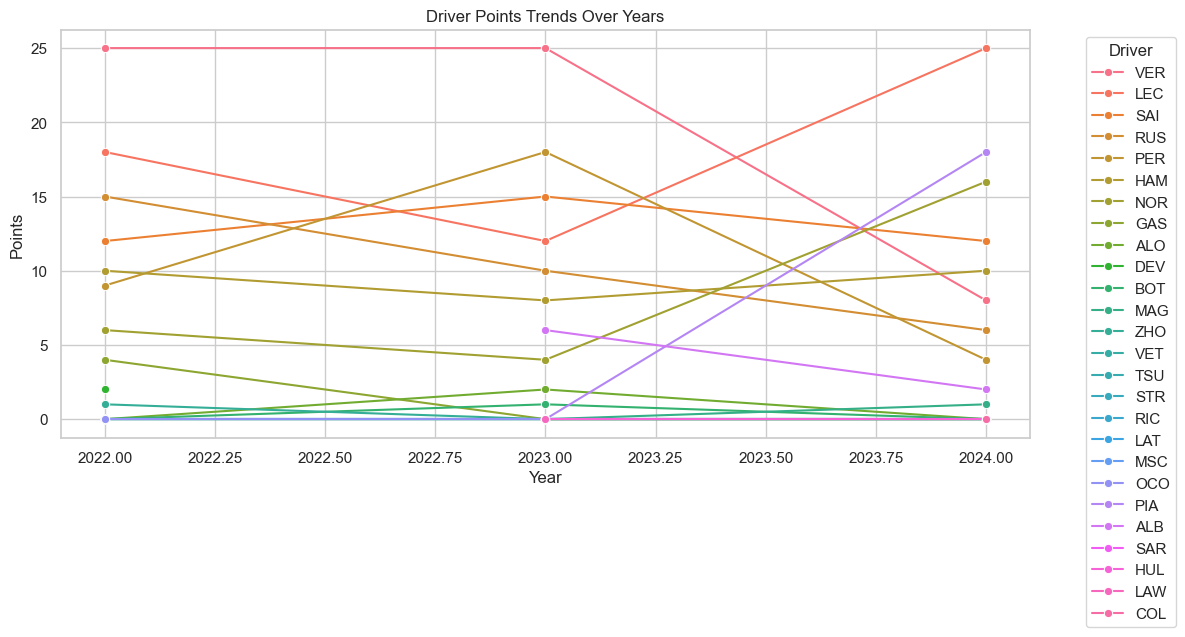

In [8]:
import fastf1 as ff1
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Global Variables
regulationYear = 2022
currentYear = datetime.now().year
gpEvent = 'R'

def validateTrack(grandPrix):
    """
    Validate that the given Grand Prix name matches an official track name in FastF1.
    """
    yearToCheck = regulationYear  # Use the regulation year for track validation
    try:
        ff1.get_session(yearToCheck, grandPrix, gpEvent)  # Try loading the session
        return True
    except Exception:
        print(f"Error: '{grandPrix}' does not match an official track name in FastF1.")
        return False

def raceAnalysis(grandPrix):
    """
    Analyze driver and team performance at a given Grand Prix across years.
    """
    if not validateTrack(grandPrix):
        return None

    # Get all the years within the regulation window
    yearList = list(range(regulationYear, currentYear + 1))

    # Dictionary to store driver points data
    driverPointsData = {}

    # Dictionary to store team points data
    teamPointsData = {}

    for year in yearList:
        try:
            # Load race session for the given year and grand prix
            race = ff1.get_session(year, grandPrix, gpEvent)
            race.load()

            # Iterate through the session results DataFrame
            for _, row in race.results.iterrows():
                driverAbbr = row['Abbreviation']  # Driver abbreviation
                points = row['Points']  # Points scored in the race
                teamName = row['TeamName']  # Team name

                # Add points to driver data
                if driverAbbr not in driverPointsData:
                    driverPointsData[driverAbbr] = {}
                driverPointsData[driverAbbr][year] = points

                # Add points to team data
                if teamName not in teamPointsData:
                    teamPointsData[teamName] = {}
                teamPointsData[teamName][year] = teamPointsData[teamName].get(year, 0) + points

        except Exception as e:
            print(f"Could not load data for {grandPrix} in {year}: {e}")

    # Create DataFrames for driver and team points
    driverPointsDf = pd.DataFrame.from_dict(driverPointsData, orient='index')
    teamPointsDf = pd.DataFrame.from_dict(teamPointsData, orient='index')

    # Replace NaN with -99 for non-participation, but exclude from sum
    totalDriverPoints = driverPointsDf.sum(axis=1, skipna=True)  # Exclude NaN in sum
    totalTeamPoints = teamPointsDf.sum(axis=1, skipna=True)

    driverPointsDf = driverPointsDf.fillna(-99)
    teamPointsDf = teamPointsDf.fillna(-99)

    driverPointsDf['Total Points'] = totalDriverPoints
    teamPointsDf['Total Points'] = totalTeamPoints

    # Sort both DataFrames by total points
    driverPointsDf = driverPointsDf.sort_values(by='Total Points', ascending=False)
    teamPointsDf = teamPointsDf.sort_values(by='Total Points', ascending=False)

    return driverPointsDf, teamPointsDf

def visualizeTrends(driverPointsDf):
    """
    Create a visualization of driver trends over the years using Seaborn.
    """
    # Melt the DataFrame for easier plotting
    meltedDf = driverPointsDf.drop(columns=['Total Points']).reset_index().melt(
        id_vars='index', 
        var_name='Year', 
        value_name='Points'
    )
    meltedDf = meltedDf[meltedDf['Points'] != -99]  # Exclude non-participation (-99)

    # Rename columns for clarity in the plot
    meltedDf.rename(columns={'index': 'Driver'}, inplace=True)

    # Plot using Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=meltedDf, 
        x='Year', 
        y='Points', 
        hue='Driver', 
        marker='o'
    )
    plt.title("Driver Points Trends Over Years")
    plt.ylabel("Points")
    plt.xlabel("Year")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Driver")
    plt.tight_layout()
    plt.show()

# Example usage
grandPrix = "Monza"  # Replace with the desired Grand Prix name
driverDf, teamDf = raceAnalysis(grandPrix)

if driverDf is not None and teamDf is not None:
    print("Driver DataFrame:")
    print(driverDf)
    print("\nTeam DataFrame:")
    print(teamDf)

    # Visualize driver trends
    visualizeTrends(driverDf)


In [2]:
import fastf1 as ff1
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Global Variables
regulationYear = 2022
currentYear = datetime.now().year
gpEvent = 'R'

def validateTrack(grandPrix):
    """
    Validate that the given Grand Prix name matches an official track name in FastF1.
    """
    yearToCheck = regulationYear  # Use the regulation year for track validation
    try:
        ff1.get_session(yearToCheck, grandPrix, gpEvent)  # Try loading the session
        return True
    except Exception:
        print(f"Error: '{grandPrix}' does not match an official track name in FastF1.")
        return False

def raceAnalysis(grandPrix):
    """
    Analyze driver and team performance at a given Grand Prix across years.
    """
    if not validateTrack(grandPrix):
        return None

    # Get all the years within the regulation window
    yearList = list(range(regulationYear, currentYear + 1))

    # Dictionary to store driver points data
    driverPointsData = {}

    # Dictionary to store team points data
    teamPointsData = {}

    for year in yearList:
        try:
            # Load race session for the given year and grand prix
            race = ff1.get_session(year, grandPrix, gpEvent)
            race.load()

            # Iterate through the session results DataFrame
            for _, row in race.results.iterrows():
                driverAbbr = row['Abbreviation']  # Driver abbreviation
                points = row['Points']  # Points scored in the race
                teamName = row['TeamName']  # Team name

                # Add points to driver data
                if driverAbbr not in driverPointsData:
                    driverPointsData[driverAbbr] = {}
                driverPointsData[driverAbbr][year] = points

                # Add points to team data
                if teamName not in teamPointsData:
                    teamPointsData[teamName] = {}
                teamPointsData[teamName][year] = teamPointsData[teamName].get(year, 0) + points

        except Exception as e:
            print(f"Could not load data for {grandPrix} in {year}: {e}")

    # Create DataFrames for driver and team points
    driverPointsDf = pd.DataFrame.from_dict(driverPointsData, orient='index')
    teamPointsDf = pd.DataFrame.from_dict(teamPointsData, orient='index')

    # Replace NaN with -99 for non-participation, but exclude from sum
    totalDriverPoints = driverPointsDf.sum(axis=1, skipna=True)  # Exclude NaN in sum
    totalTeamPoints = teamPointsDf.sum(axis=1, skipna=True)

    driverPointsDf = driverPointsDf.fillna(-99)
    teamPointsDf = teamPointsDf.fillna(-99)

    driverPointsDf['Total Points'] = totalDriverPoints
    teamPointsDf['Total Points'] = totalTeamPoints

    # Sort both DataFrames by total points
    driverPointsDf = driverPointsDf.sort_values(by='Total Points', ascending=False)
    teamPointsDf = teamPointsDf.sort_values(by='Total Points', ascending=False)

    return driverPointsDf, teamPointsDf

def visualizeTrends(dataFrame, title, xlabel='Year', ylabel='Points', hue='Driver/Team'):
    """
    Create a visualization of trends over the years using Seaborn.
    """
    # Melt the DataFrame for easier plotting
    meltedDf = dataFrame.drop(columns=['Total Points']).reset_index().melt(
        id_vars='index', 
        var_name='Year', 
        value_name='Points'
    )
    meltedDf = meltedDf[meltedDf['Points'] != -99]  # Exclude non-participation (-99)

    # Rename columns for clarity in the plot
    meltedDf.rename(columns={'index': hue}, inplace=True)

    # Plot using Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=meltedDf, 
        x='Year', 
        y='Points', 
        hue=hue, 
        marker='o'
    )
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(ticks=meltedDf['Year'].unique(), labels=meltedDf['Year'].unique())  # Show years as integers
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=hue)
    plt.show()

# Example usage
grandPrix = "Monza"  # Replace with the desired Grand Prix name
driverDf, teamDf = raceAnalysis(grandPrix)

if driverDf is not None and teamDf is not None:
    print("Driver DataFrame:")
    print(driverDf)
    print("\nTeam DataFrame:")
    print(teamDf)

    # Visualize driver trends
    visualizeTrends(driverDf, title="Driver Points Trends Over Years", hue="Driver")

    # Visualize team trends
    visualizeTrends(teamDf, title="Team Points Trends Over Years", hue="Team")


core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']
core           INFO 	Loading data for Italian Grand Prix - Race

Driver DataFrame:
     2022  2023  2024  Total Points
VER  25.0  25.0   8.0          58.0
LEC  18.0  12.0  25.0          55.0
SAI  12.0  15.0  12.0          39.0
RUS  15.0  10.0   6.0          31.0
PER   9.0  18.0   4.0          31.0
HAM  10.0   8.0  10.0          28.0
NOR   6.0   4.0  16.0          26.0
PIA -99.0   0.0  18.0          18.0
ALB -99.0   6.0   2.0           8.0
GAS   4.0   0.0   0.0           4.0
ALO   0.0   2.0   0.0           2.0
DEV   2.0 -99.0 -99.0           2.0
BOT   0.0   1.0   0.0           1.0
MAG   0.0   0.0   1.0           1.0
ZHO   1.0   0.0   0.0           1.0
SAR -99.0   0.0 -99.0           0.0
HUL -99.0   0.0   0.0           0.0
VET   0.0 -99.0 -99.0           0.0
LAW -99.0   0.0 -99.0           0.0
TSU   0.0   0.0   0.0           0.0
STR   0.0   0.0   0.0           0.0
RIC   0.0 -99.0   0.0           0.0
LAT   0.0 -99.0 -99.0           0.0
MSC   0.0 -99.0 -99.0           0.0
OCO   0.0   0.0   0.0           0.0
COL -99.0 -99.0   0.0           0.0

Team Data

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1200x600 with 1 Axes>

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1200x600 with 1 Axes>